# First Autoencoder  

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Data 생성
- 3 차원 data 생성

In [2]:
m = 100
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
data.shape

(100, 3)

- 3차원 data 시각화

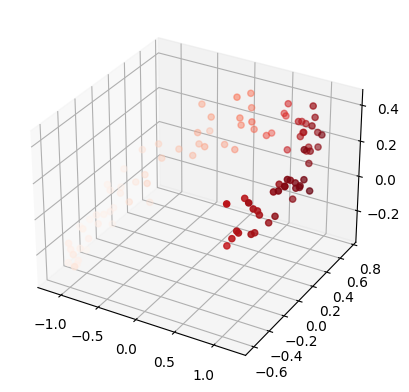

In [3]:
X_train = data

ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0],X_train[:,1],X_train[:,2], c=X_train[:,0], cmap='Reds')

## Autoencoder model 작성

- 3 차원 data 를 2 차원으로 차원 축소

In [4]:
encoder = keras.models.Sequential([
    keras.layers.Dense(2, input_shape=(3,))
])

In [5]:
decoder = keras.models.Sequential([
    keras.layers.Dense(3,input_shape=(2,))
])

In [6]:
autoencoder = keras.models.Sequential([encoder,decoder])
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 2)                 8         
                                                                 
 sequential_1 (Sequential)   (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(loss='mae',optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [8]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6178
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4333
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3976
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3758
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3537
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3335
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3191
Epoch 8/200
4/4 [==============================] - 0s 624us/step - loss: 0.3018
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2950
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2761
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2499
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2246
Epoch 13/200
4/4 [==============================] - 0s 5ms/

4/4 [==============================] - 0s 0s/step - loss: 0.0445
Epoch 105/200
4/4 [==============================] - 0s 700us/step - loss: 0.0446
Epoch 106/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 107/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 108/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 109/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 110/200
4/4 [==============================] - 0s 0s/step - loss: 0.0439
Epoch 111/200
4/4 [==============================] - 0s 0s/step - loss: 0.0399
Epoch 112/200
4/4 [==============================] - 0s 0s/step - loss: 0.0482
Epoch 113/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 114/200
4/4 [==============================] - 0s 0s/step - loss: 0.0434
Epoch 115/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0460
Epoch 116/200
4/4 [==============================] - 0s 0

## encoder output 시각화

- 학습시킨 encoder 를 이용하여 data를 차원 축소

In [9]:
encodings = encoder.predict(X_train)
encodings.shape

4/4 [==============================] - 0s 4ms/step


(100, 2)

- encoder output을 시각화 

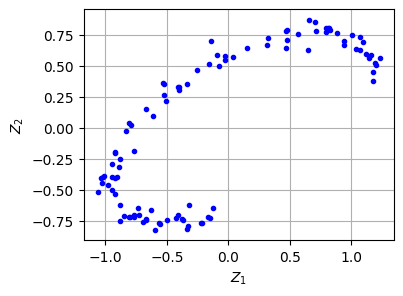

In [10]:
plt.figure(figsize=(4,3))
plt.plot(encodings[:,0], encodings[:,1],'b.')
plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.grid()
plt.show()

## Decoder 를 이용한 data 복원

- 학습된 decoder를 이용하여 data 복원

In [11]:
decodings = decoder.predict(encodings)
decodings.shape

4/4 [==============================] - 0s 1ms/step


(100, 3)

- 복원된 data 시각화

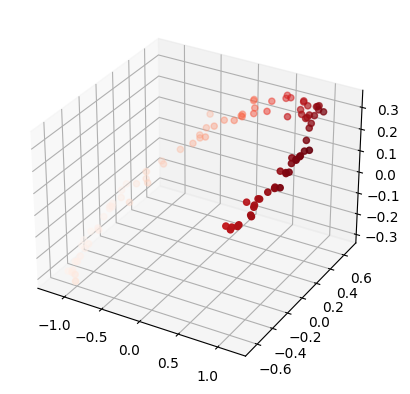

In [12]:
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:,0],decodings[:,1],decodings[:,2], c=decodings[:,0], cmap='Reds')